In [1]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Activation, Flatten, Dense, Dropout, BatchNormalization, SeparableConv2D
from keras.layers.merge import concatenate
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from google.colab import drive

import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017)

drive.mount('/content/gdrive')
dir="/content/gdrive/My Drive/Colab Notebooks/EVA/Weights/"
!ls

# Hyperparameters
batch_size = 128
num_classes = 10

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
print(train_features.shape)
print(test_features.shape)

num_train, img_rows, img_cols, img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape

# num_classes=10
num_classes = len(np.unique(train_labels))
print(num_train, num_test, img_channels)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
50000 10000 3


In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Model from 6A : For 20 epochs, best validation accuracy is 81.43% at epoch 18, when training acc is 95.43%

In [0]:
def build_model():
  model = Sequential()
  
  model.add(Conv2D(48, 3, padding='same', input_shape=(32, 32, 3))) #rf 3
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Conv2D(96, 3, padding='same')) 
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(64, 1 ))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #16, rf10  

  model.add(Conv2D(96, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Conv2D(192, 3, padding='same')) #16, rf14
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(128, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #8, rf28
  
  model.add(Conv2D(192, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Conv2D(384, 3, padding='same'))#8, rf32
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(200, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #4, rf64
   
  model.add(Conv2D(100, 1))
  model.add(Activation('relu'))
  model.add(Conv2D(10, 4))
    
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model = build_model()
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 96)        41568     
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 96)        384       
__________

In [0]:
model.fit(train_features, train_labels, batch_size=128, epochs=20, verbose=1,
          validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 29s 571us/step - loss: 1.3099 - acc: 0.5301 - val_loss: 1.0711 - val_acc: 0.6378
Epoch 2/20
50000/50000 [==============================] - 26s 525us/step - loss: 0.8384 - acc: 0.7037 - val_loss: 1.1115 - val_acc: 0.6393
Epoch 3/20
50000/50000 [==============================] - 27s 530us/step - loss: 0.6806 - acc: 0.7592 - val_loss: 0.8594 - val_acc: 0.7173
Epoch 4/20
50000/50000 [==============================] - 27s 533us/step - loss: 0.5799 - acc: 0.7977 - val_loss: 0.7789 - val_acc: 0.7338
Epoch 5/20
50000/50000 [==============================] - 26s 526us/step - loss: 0.5112 - acc: 0.8225 - val_loss: 0.7624 - val_acc: 0.7459
Epoch 6/20
50000/50000 [==============================] - 26s 529us/step - loss: 0.4531 - acc: 0.8408 - val_loss: 0.9219 - val_acc: 0.7092
Epoch 7/20
50000/50000 [==============================] - 26s 528us/step - loss: 0.3991 - acc: 0.8595 - val_loss: 0.

#### Added depthwise separable conv in 3 channel-heavy conv layers. Parameters reduced from 1.3m to 0.52m. For 20 epochs, best validation accuracy is 81.89% at epoch 17, when training acc is 91.27%. 
With less than half parameters, no drop in accuracy. Since training accuracy has dropped from 95 to 91%, overfitting is reduced.

In [0]:
def build_first_model():
  model = Sequential()
  
  model.add(Conv2D(48, 3, padding='same', input_shape=(32, 32, 3))) #rf 3
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(SeparableConv2D(96, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(64, 1 ))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #16, rf10  

  model.add(Conv2D(96, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(SeparableConv2D(192, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(128, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #8, rf28
  
  model.add(Conv2D(192, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(SeparableConv2D(384, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(200, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #4, rf64
   
  model.add(Conv2D(100, 1))
  model.add(Activation('relu'))
  model.add(Conv2D(10, 4))
    
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model=build_first_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_64 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_36 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 32, 32, 96)        5136      
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 96)        384       
__________

In [0]:
model.fit(train_features, train_labels, batch_size=128, epochs=20, verbose=1,
          validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 26s 514us/step - loss: 1.3540 - acc: 0.5139 - val_loss: 1.0930 - val_acc: 0.6179
Epoch 2/20
50000/50000 [==============================] - 23s 454us/step - loss: 0.9265 - acc: 0.6720 - val_loss: 0.9201 - val_acc: 0.6807
Epoch 3/20
50000/50000 [==============================] - 23s 457us/step - loss: 0.7658 - acc: 0.7293 - val_loss: 0.8419 - val_acc: 0.7053
Epoch 4/20
50000/50000 [==============================] - 23s 454us/step - loss: 0.6697 - acc: 0.7666 - val_loss: 0.9164 - val_acc: 0.6995
Epoch 5/20
50000/50000 [==============================] - 23s 453us/step - loss: 0.5920 - acc: 0.7930 - val_loss: 0.8190 - val_acc: 0.7187
Epoch 6/20
50000/50000 [==============================] - 23s 453us/step - loss: 0.5409 - acc: 0.8098 - val_loss: 0.8564 - val_acc: 0.7173
Epoch 7/20
50000/50000 [==============================] - 23s 454us/step - loss: 0.4933 - acc: 0.8265 - val_loss: 0.

#### Added spatial separable conv in 3 channel-heavy conv. layers. Parameters reduced from 1.3m to 0.862m.
For 20 epochs, best validation accuracy is 81.31% at epoch 16, when training acc is 93.88%. Only slight drop in accuracy.

In [0]:
def spatial_sep_conv(model, filter_x, filter_out):
    l1 = Conv2D(filter_x, (3, 1), activation='relu', padding='same')
    l2 = Conv2D(filter_out, (1,3), activation='relu', padding='same')
    model.add(l1)
    model.add(l2)
    print(type(l1), l1.output_shape, l2.output_shape)
    return model

In [0]:
def build_second_model():
  model = Sequential()
  
  model.add(Conv2D(48, 3, padding='same', input_shape=(32, 32, 3))) #rf 3
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))  
  model = spatial_sep_conv(model, 48, 96)
  model.add(BatchNormalization())
    
  model.add(Conv2D(64, 1 ))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #16, rf10  

  model.add(Conv2D(96, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model = spatial_sep_conv(model, 96, 192)
  model.add(Activation('relu'))
  model.add(BatchNormalization())
    
  model.add(Conv2D(128, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #8, rf28
  
  model.add(Conv2D(192, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model = spatial_sep_conv(model, 192, 384)
  model.add(Activation('relu'))
  model.add(BatchNormalization())
    
  model.add(Conv2D(200, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #4, rf64
   
  model.add(Conv2D(100, 1))
  model.add(Activation('relu'))
  model.add(Conv2D(10, 4))
    
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model=build_second_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

(None, 32, 32, 48) (None, 32, 32, 96)
(None, 16, 16, 96) (None, 16, 16, 192)
(None, 8, 8, 192) (None, 8, 8, 384)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 48)        6960      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 96)        13920     
_____________________________

In [0]:
model.fit(train_features, train_labels, batch_size=128, epochs=20, verbose=1,
          validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4077 - acc: 0.4925 - val_loss: 1.3704 - val_acc: 0.5397
Epoch 2/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9788 - acc: 0.6530 - val_loss: 1.1442 - val_acc: 0.6281
Epoch 3/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.7736 - acc: 0.7280 - val_loss: 1.0112 - val_acc: 0.6622
Epoch 4/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.6522 - acc: 0.7723 - val_loss: 1.0051 - val_acc: 0.6797
Epoch 5/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5716 - acc: 0.7982 - val_loss: 0.6610 - val_acc: 0.7740
Epoch 6/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5056 - acc: 0.8229 - val_loss: 0.7793 - val_acc: 0.7363
Epoch 7/20
50000/50000 [==============================] - 57s 1ms/step - loss: 0.4514 - acc: 0.8413 - val_loss: 0.8771 - val_acc

In [0]:
def spatial_sep_conv2(filter_x, filter_out, layer_in):
    l1 = Conv2D(filter_x, (3,1), activation='relu', padding='same')(layer_in)
    l2 = Conv2D(filter_out, (1,3), activation='relu', padding='same')(l1)
    print(type(l1), l1.shape, l2.shape)
    return l2

#### Using 5 types of conv : Normal (3x3), spatially separable, depthwise separable, grouped conv. Parameters are inc to 2.8m from 1.3m.
### Best validation accuracy in 50 epochs is 81.7% at epoch 48, with training accuracy at 98.13%. This model shows distinct overfitting with training accuracy > 98%

In [10]:
input = Input(shape=(img_rows, img_cols, img_channels,))

layer1 = Conv2D(32, 3, padding='same', activation='relu')(input)
layer1 = BatchNormalization()(layer1)
layer1 = Dropout(0.1)(layer1) 
print("Layer1 shape", layer1.shape)
layer2 = Conv2D(64, 3, padding='same', activation='relu')(layer1)
layer2 = BatchNormalization()(layer2)
layer2 = Dropout(0.1)(layer2)
print("Layer2 shape", layer2.shape)

layer3 = Conv2D(48, 1, padding='same', activation='relu')(layer2)
layer3 = MaxPooling2D(pool_size=(2, 2))(layer3)

# Spatially Separable Convolution
layer4 = spatial_sep_conv2(48, 64, layer3)
layer4 = BatchNormalization()(layer4)
layer4 = Dropout(0.1)(layer4)
print("Layer4 spatial sep conv shape", layer4.shape)

# Depthwise Separable Convolution
layer5 = SeparableConv2D(128, 3, padding='same', activation='relu')(layer4)
layer5 = BatchNormalization()(layer5)
layer5 = Dropout(0.1)(layer5)
print("Layer5 depth sep conv shape", layer5.shape)

layer6 = Conv2D(96, 1, padding='same', activation='relu')(layer5)
layer6 = MaxPooling2D(pool_size=(2, 2))(layer6)
temp1 = layer6

# Group conv 1
layer7 = Conv2D(128, 3, padding='same', activation='relu')(layer6)
layer7 = BatchNormalization()(layer7)
layer7b = Conv2D(128, 5, padding='same', activation='relu')(temp1)
layer7b = BatchNormalization()(layer7b)
print("Layer7 shape", layer7.shape, layer7b.shape)
layer8 = concatenate([layer7, layer7b])
print("After concat, layer8 shape", layer8.shape)
layer8 = Dropout(0.1)(layer8)
temp2 = layer8

# Group conv 2
layer9 = Conv2D(256, 3, padding='same', activation='relu')(layer8)
layer9 = BatchNormalization()(layer9)
layer9b = Conv2D(256, 5, padding='same', dilation_rate=(2,2), activation='relu')(temp2)
layer9b = BatchNormalization()(layer9b)
print("Layer9 shape", layer9.shape, layer9b.shape)
layer10 = concatenate([layer9, layer9b])
print("After concat, layer10 shape", layer10.shape)
layer10 = Dropout(0.1)(layer10)

layer11 = Conv2D(250, 1, activation='relu')(layer10)
layer11 = MaxPooling2D(pool_size=(2, 2))(layer11)
print("Layer11 shape after MP", layer11.shape)

layer12 = Conv2D(100, 1, activation='relu')(layer11)
layer13 = Conv2D(num_classes, 4)(layer12)
print("Layer12,13 shape", layer12.shape, layer13.shape)

output = Flatten()(layer13)
output = Activation('softmax')(output)
#, activation='softmax'
print("Output shape", output.shape)

Layer1 shape (?, 32, 32, 32)
Layer2 shape (?, 32, 32, 64)
<class 'tensorflow.python.framework.ops.Tensor'> (?, 16, 16, 48) (?, 16, 16, 64)
Layer4 spatial sep conv shape (?, 16, 16, 64)
Layer5 depth sep conv shape (?, 16, 16, 128)
Layer7 shape (?, 8, 8, 128) (?, 8, 8, 128)
After concat, layer8 shape (?, 8, 8, 256)
Layer9 shape (?, 8, 8, 256) (?, 8, 8, 256)
After concat, layer10 shape (?, 8, 8, 512)
Layer11 shape after MP (?, 4, 4, 250)
Layer12,13 shape (?, 4, 4, 100) (?, 1, 1, 10)
Output shape (?, ?)


In [11]:
model = Model(inputs=[input], outputs=[output])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 32, 32, 32)   128         conv2d_14[0][0]                  
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 32, 32, 32)   0           batch_normalization_9[0][0]      
__________________________________________________________________________________________________
conv2d_15 

In [12]:
file = dir + "Assign6B.{epoch:02d}-{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_info = model.fit(train_features, train_labels, batch_size=batch_size, epochs=50, verbose=1,
          validation_data=(test_features, test_labels), callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 86s 2ms/step - loss: 1.3665 - acc: 0.5144 - val_loss: 1.3767 - val_acc: 0.5361

Epoch 00001: val_acc improved from -inf to 0.53610, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign6B.01-0.536.hdf5
Epoch 2/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.8617 - acc: 0.6944 - val_loss: 0.9191 - val_acc: 0.6776

Epoch 00002: val_acc improved from 0.53610 to 0.67760, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign6B.02-0.678.hdf5
Epoch 3/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6825 - acc: 0.7599 - val_loss: 0.7744 - val_acc: 0.7318

Epoch 00003: val_acc improved from 0.67760 to 0.73180, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign6B.03-0.732.hdf5
Epoch 4/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.5780 - acc: 0.797

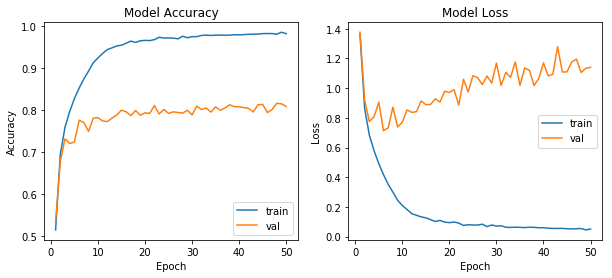

In [14]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(10,4))
    
    # Plot training & validation accuracy values
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    #axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Plot training & validation loss values
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [15]:
model.load_weights(dir + "Assign6B.48-0.817.hdf5")
print("Loaded model from disk ")

score = model.evaluate(test_features, test_labels)
print(score)

Loaded model from disk 
10000/10000 [==============================] - 6s 552us/step
[1.1051891950309276, 0.8166]
